In [ ]:
import pandas as pd
import os

# Path to the directory containing your CSV files
csv_directory = "csv"

# List to hold DataFrame objects
dfs = []

# Loop through each CSV file in the directory
for month, csv_file in enumerate(os.listdir(csv_directory), 1):
    # Full path to the CSV file
    csv_path = os.path.join(csv_directory, csv_file)
    
    # Read the CSV into a DataFrame
    df = pd.read_csv(csv_path, delimiter=';')
    
    # Add a "Month" column to the DataFrame
    df['Month'] = month
    
    # Append the DataFrame to the list
    dfs.append(df)

# Concatenate all DataFrames in the list into a single DataFrame
combined_df = pd.concat(dfs, ignore_index=True)

# Save the combined DataFrame to a new CSV file
combined_df.to_csv("combined_data.csv", index=False)


In [ ]:
# Read the combined CSV into a DataFrame
df = pd.read_csv('combined_data.csv', delimiter=';')

# Print the column names
print(df.columns)

In [ ]:
print(df.dtypes)

In [ ]:
df['FileZwaarte'] = pd.to_numeric(df['FileZwaarte'], errors='coerce')

In [ ]:
print(df['FileZwaarte'].dtype)

In [ ]:
print(df['FileZwaarte'].unique())


In [ ]:
# Replace commas with dots
df['FileZwaarte'] = df['FileZwaarte'].str.replace(',', '.')

# Convert to float
df['FileZwaarte'] = pd.to_numeric(df['FileZwaarte'], errors='coerce')

In [ ]:
print(df['FileZwaarte'].dtype)

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Read the combined CSV into a DataFrame
df = pd.read_csv('combined_data.csv', delimiter=',')

# Replace commas with dots in the 'FileZwaarte' column
df['FileZwaarte'] = df['FileZwaarte'].str.replace(',', '.')

# Convert 'FileZwaarte' to float
df['FileZwaarte'] = pd.to_numeric(df['FileZwaarte'], errors='coerce')

# Convert 'DatumFileBegin' and 'DatumFileEind' to datetime objects
df['DatumFileBegin'] = pd.to_datetime(df['DatumFileBegin'])
df['DatumFileEind'] = pd.to_datetime(df['DatumFileEind'])

# Extract the month from the 'DatumFileBegin' column and create a new 'Month' column
df['Month'] = df['DatumFileBegin'].dt.month

# Print data types and NaN counts for debugging
print("Data Types:\n", df.dtypes)
print("\nNaN Counts:\n", df.isna().sum())

# Subset the DataFrame to only include the 'Month' and 'FileZwaarte' columns
subset_df = df[['Month', 'FileZwaarte']]

# Group the data by 'Month' and calculate the average 'FileZwaarte'
monthly_avg_congestion = subset_df.groupby('Month')['FileZwaarte'].mean().reset_index()

# Plotting
plt.figure(figsize=(10, 6))
plt.bar(monthly_avg_congestion['Month'], monthly_avg_congestion['FileZwaarte'])
plt.xlabel('Month')
plt.ylabel('Average Traffic jam severity')
plt.title('Average Traffic jam severity by Month(2022)')
plt.xticks(ticks=range(1, 13), labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.show()


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Function to map month to season
def month_to_season(month):
    if month in [12, 1, 2]:
        return 'Winter'
    elif month in [3, 4, 5]:
        return 'Spring'
    elif month in [6, 7, 8]:
        return 'Summer'
    else:
        return 'Autumn'


# Read the combined CSV into a DataFrame
df = pd.read_csv('combined_data.csv', delimiter=',')

# Replace commas with dots in the 'FileZwaarte' column
df['FileZwaarte'] = df['FileZwaarte'].str.replace(',', '.')

# Convert 'FileZwaarte' to float
df['FileZwaarte'] = pd.to_numeric(df['FileZwaarte'], errors='coerce')

# Convert dates to datetime objects
df['DatumFileBegin'] = pd.to_datetime(df['DatumFileBegin'])
df['DatumFileEind'] = pd.to_datetime(df['DatumFileEind'])

# Extract the month and map it to a season
df['Month'] = df['DatumFileBegin'].dt.month
df['Season'] = df['Month'].apply(month_to_season)

# Make 'Season' a categorical variable with a custom order
df['Season'] = pd.Categorical(df['Season'], categories=['Winter', 'Spring', 'Summer', 'Autumn'], ordered=True)

# Subset the DataFrame to only include the 'Season' and 'FileZwaarte' columns
subset_df = df[['Season', 'FileZwaarte']]

# Group the data by 'Season' and calculate the average 'FileZwaarte'
seasonal_avg_congestion = subset_df.groupby('Season')['FileZwaarte'].mean().reset_index()

# Plotting
plt.figure(figsize=(10, 6))
plt.bar(seasonal_avg_congestion['Season'], seasonal_avg_congestion['FileZwaarte'])
plt.xlabel('Season')
plt.ylabel('Average FileZwaarte')
plt.title('Average Traffic Congestion by Season')
plt.show()


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Function to map month to season
def month_to_season(month):
    if month in [12, 1, 2]:
        return 'Winter'
    elif month in [3, 4, 5]:
        return 'Spring'
    elif month in [6, 7, 8]:
        return 'Summer'
    else:
        return 'Autumn'

# Read the combined CSV into a DataFrame
df = pd.read_csv('combined_data.csv', delimiter=',')

# Replace commas with dots in the 'GemLengte' column
df['GemLengte'] = df['GemLengte'].str.replace(',', '.')

# Convert 'GemLengte' to float
df['GemLengte'] = pd.to_numeric(df['GemLengte'], errors='coerce')

# Convert dates to datetime objects
df['DatumFileBegin'] = pd.to_datetime(df['DatumFileBegin'])
df['DatumFileEind'] = pd.to_datetime(df['DatumFileEind'])

# Extract the month and map it to a season
df['Month'] = df['DatumFileBegin'].dt.month
df['Season'] = df['Month'].apply(month_to_season)

# Make 'Season' a categorical variable with a custom order
df['Season'] = pd.Categorical(df['Season'], categories=['Winter', 'Spring', 'Summer', 'Autumn'], ordered=True)

# Subset the DataFrame to only include the 'Season' and 'GemLengte' columns
subset_df = df[['Season', 'GemLengte']]

# Group the data by 'Season' and calculate the average 'GemLengte'
seasonal_avg_length = subset_df.groupby('Season')['GemLengte'].mean().reset_index()

# Plotting
plt.figure(figsize=(10, 6))
plt.bar(seasonal_avg_length['Season'], seasonal_avg_length['GemLengte'])
plt.xlabel('Season')
plt.ylabel('Average GemLengte')
plt.title('Average Traffic Jam Length by Season')
plt.show()


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Function to map month to season
def month_to_season(month):
    if month in [12, 1, 2]:
        return 'Winter'
    elif month in [3, 4, 5]:
        return 'Spring'
    elif month in [6, 7, 8]:
        return 'Summer'
    else:
        return 'Autumn'

# Read the combined CSV into a DataFrame
df = pd.read_csv('combined_data.csv', delimiter=',')

# Replace commas with dots in the 'FileDuur' column if they are present
df['FileDuur'] = df['FileDuur'].str.replace(',', '.')

# Convert 'FileDuur' to float
df['FileDuur'] = pd.to_numeric(df['FileDuur'], errors='coerce')

# Convert dates to datetime objects
df['DatumFileBegin'] = pd.to_datetime(df['DatumFileBegin'])
df['DatumFileEind'] = pd.to_datetime(df['DatumFileEind'])

# Extract the month and map it to a season
df['Month'] = df['DatumFileBegin'].dt.month
df['Season'] = df['Month'].apply(month_to_season)

# Make 'Season' a categorical variable with a custom order
df['Season'] = pd.Categorical(df['Season'], categories=['Winter', 'Spring', 'Summer', 'Autumn'], ordered=True)

# Subset the DataFrame to only include the 'Season' and 'FileDuur' columns
subset_df = df[['Season', 'FileDuur']]

# Group the data by 'Season' and calculate the average 'FileDuur'
seasonal_avg_duration = subset_df.groupby('Season')['FileDuur'].mean().reset_index()

# Plotting
plt.figure(figsize=(10, 6))
plt.bar(seasonal_avg_duration['Season'], seasonal_avg_duration['FileDuur'])
plt.xlabel('Season')
plt.ylabel('Average congestation time')
plt.title('Average Traffic Jam Duration by Season (2022)')
plt.show()


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Function to map month to season
def month_to_season(month):
    if month in [12, 1, 2]:
        return 'Winter'
    elif month in [3, 4, 5]:
        return 'Spring'
    elif month in [6, 7, 8]:
        return 'Summer'
    else:
        return 'Autumn'

# Read the combined CSV into a DataFrame
df = pd.read_csv('combined_data.csv', delimiter=',')

# Replace commas with dots in the 'FileDuur' column if they are present
df['FileDuur'] = df['FileDuur'].str.replace(',', '.')

# Convert 'FileDuur' to float
df['FileDuur'] = pd.to_numeric(df['FileDuur'], errors='coerce')

# Convert dates to datetime objects
df['DatumFileBegin'] = pd.to_datetime(df['DatumFileBegin'])
df['DatumFileEind'] = pd.to_datetime(df['DatumFileEind'])

# Extract the month and map it to a season
df['Month'] = df['DatumFileBegin'].dt.month
df['Season'] = df['Month'].apply(month_to_season)

# Make 'Season' a categorical variable with a custom order
df['Season'] = pd.Categorical(df['Season'], categories=['Winter', 'Spring', 'Summer', 'Autumn'], ordered=True)

# Subset the DataFrame to only include the 'Season' and 'FileDuur' columns
subset_df = df[['Season', 'FileDuur']]

# Group the data by 'Season' and calculate the maximum 'FileDuur'
seasonal_max_duration = subset_df.groupby('Season')['FileDuur'].max().reset_index()

# Convert maximum durations from minutes to hours
seasonal_max_duration['FileDuur'] = seasonal_max_duration['FileDuur'] / 60

# Plotting
plt.figure(figsize=(10, 6))
bars = plt.bar(seasonal_max_duration['Season'], seasonal_max_duration['FileDuur'], width=0.6)

# Label the bars with their heights in hours
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, f"{round(yval, 2)} hrs", va='bottom')  # va: vertical alignment

plt.xlabel('Season')
plt.ylabel('Maximum FileDuur (hrs)')
plt.title('Maximum Traffic Jam Duration by Season (in hours)')
plt.show()


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Function to map month to season
def month_to_season(month):
    if month in [12, 1, 2]:
        return 'Winter'
    elif month in [3, 4, 5]:
        return 'Spring'
    elif month in [6, 7, 8]:
        return 'Summer'
    else:
        return 'Autumn'
    
def float_to_hours_minutes(float_hours):
    hours = int(float_hours)
    minutes = int((float_hours - hours) * 60)
    return f"{hours}h {minutes}m"

# Read the combined CSV into a DataFrame
df = pd.read_csv('combined_data.csv', delimiter=',')

# Replace commas with dots in the 'FileDuur' column if they are present
df['FileDuur'] = df['FileDuur'].str.replace(',', '.')

# Convert 'FileDuur' to float
df['FileDuur'] = pd.to_numeric(df['FileDuur'], errors='coerce')

# Convert dates to datetime objects
df['DatumFileBegin'] = pd.to_datetime(df['DatumFileBegin'])
df['DatumFileEind'] = pd.to_datetime(df['DatumFileEind'])

# Extract the month and map it to a season
df['Month'] = df['DatumFileBegin'].dt.month
df['Season'] = df['Month'].apply(month_to_season)

# Make 'Season' a categorical variable with a custom order
df['Season'] = pd.Categorical(df['Season'], categories=['Winter', 'Spring', 'Summer', 'Autumn'], ordered=True)

# Subset the DataFrame to only include the 'Season' and 'FileDuur' columns
subset_df = df[['Season', 'FileDuur']]

# Group the data by 'Season' and calculate the 95th percentile of 'FileDuur'
seasonal_95th_duration = subset_df.groupby('Season')['FileDuur'].quantile(0.95).reset_index()

# Convert 95th percentile durations from minutes to hours
seasonal_95th_duration['FileDuur'] = seasonal_95th_duration['FileDuur'] / 60

# Plotting
plt.figure(figsize=(10, 6))
bars = plt.bar(seasonal_95th_duration['Season'], seasonal_95th_duration['FileDuur'], width=0.6)

# Label the bars with their heights in hours and minutes
for bar in bars:
    yval = bar.get_height()
    formatted_yval = float_to_hours_minutes(yval)
    plt.text(bar.get_x() + bar.get_width()/2, yval, formatted_yval, va='bottom')  # va: vertical alignment

plt.xlabel('Season')
plt.ylabel('95th Percentile FileDuur (hrs)')
plt.title('95th Percentile Traffic Jam Duration by Season')
plt.show()


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Function to map month to season
def month_to_season(month):
    if month in [12, 1, 2]:
        return 'Winter'
    elif month in [3, 4, 5]:
        return 'Spring'
    elif month in [6, 7, 8]:
        return 'Summer'
    else:
        return 'Autumn'

# Read the combined CSV into a DataFrame
df = pd.read_csv('combined_data.csv', delimiter=',')

# Replace commas with dots in the 'FileDuur' column if they are present
df['FileDuur'] = df['FileDuur'].str.replace(',', '.')

# Convert 'FileDuur' to float
df['FileDuur'] = pd.to_numeric(df['FileDuur'], errors='coerce')

# Convert dates to datetime objects
df['DatumFileBegin'] = pd.to_datetime(df['DatumFileBegin'])
df['DatumFileEind'] = pd.to_datetime(df['DatumFileEind'])

# Extract the month and map it to a season
df['Month'] = df['DatumFileBegin'].dt.month
df['Season'] = df['Month'].apply(month_to_season)

# Make 'Season' a categorical variable with a custom order
df['Season'] = pd.Categorical(df['Season'], categories=['Winter', 'Spring', 'Summer', 'Autumn'], ordered=True)

# Subset the DataFrame to only include the 'Season' and 'FileDuur' columns
subset_df = df[['Season', 'FileDuur']]

# Group the data by 'Season' and calculate the median 'FileDuur'
seasonal_median_duration = subset_df.groupby('Season')['FileDuur'].median().reset_index()

# Convert median durations from minutes to hours
seasonal_median_duration['FileDuur'] = seasonal_median_duration['FileDuur'] / 60

# Plotting
plt.figure(figsize=(10, 6))
bars = plt.bar(seasonal_median_duration['Season'], seasonal_median_duration['FileDuur'], width=0.6)

# Label the bars with their heights in hours
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, f"{round(yval, 2)} hrs", va='bottom')  # va: vertical alignment

plt.xlabel('Season')
plt.ylabel('Median FileDuur (hrs)')
plt.title('Median Traffic Jam Duration by Season (in hours)')
plt.show()


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Read the combined CSV into a DataFrame
df = pd.read_csv('combined_data.csv', delimiter=',')

# print(df['Oorzaak_1'].unique)

# # Group similar terms together
# df['Oorzaak_1'] = df['Oorzaak_1'].replace(['drukte', 'hoge intensiteit', 'spitsfile'], 'High Traffic')

# Count the occurrences of each reason in 'Oorzaak_1'
total_reason_counts = df['Oorzaak_1'].value_counts()

# Sort the reasons by frequency and take the top 4
top_4_reasons = total_reason_counts.sort_values(ascending=False).head(4)

# Sum the counts of all the other reasons
other_count = total_reason_counts.sum() - top_4_reasons.sum()

# Add 'Other' category to the top 4 reasons
other_series = pd.Series([other_count], index=['Other'])
final_reason_counts = pd.concat([top_4_reasons, other_series])

# Create the pie chart
plt.figure(figsize=(8, 8))
plt.pie(final_reason_counts, labels=final_reason_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Top 4 Primary Reasons for Traffic Jams + Others')
plt.show()


In [ ]:
x= df['OorzaakVerloop'].unique

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Read the combined CSV into a DataFrame
df = pd.read_csv('combined_data.csv', delimiter=',')

# Count occurrences of each unique value
reason_counts = df['OorzaakVerloop'].value_counts()

# Take the top 4 most common reasons
top_4_reasons = reason_counts.nlargest(4)

# Sum the counts of all the other reasons
other_count = reason_counts.sum() - top_4_reasons.sum()
print(type(top_4_reasons))
# Add 'Other' category to the top 4 reasons
final_reason_counts = pd.concat([top_4_reasons, pd.Series([other_count], index=['Other'])])


# Create the pie chart
plt.figure(figsize=(8, 8))
plt.pie(final_reason_counts, labels=final_reason_counts.index, autopct='%1.1f%%')
plt.title('Distribution of Traffic Jam Causes (OorzaakVerloop)')
plt.show()

In [ ]:
df['OorzaakVerloop'].unique

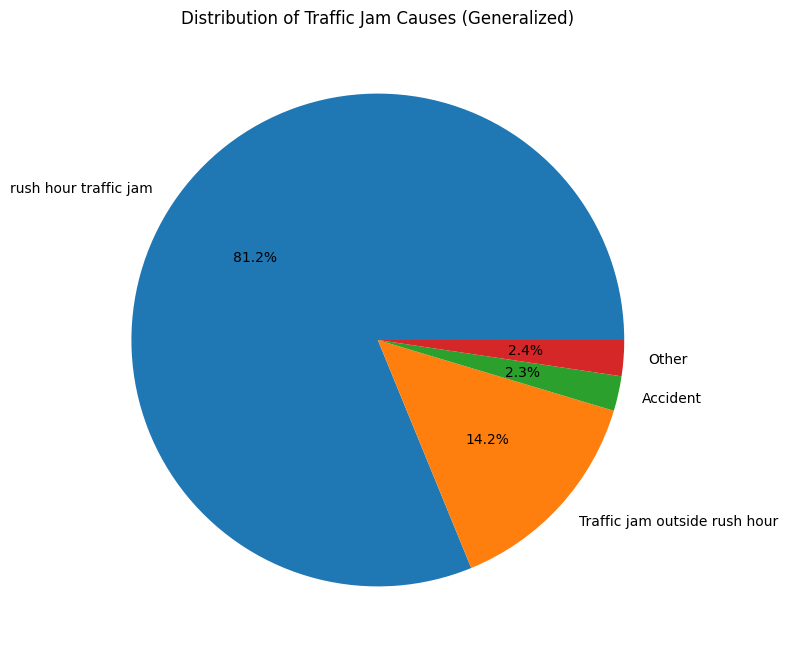

In [85]:
import pandas as pd
import matplotlib.pyplot as plt

# Function to map detailed causes to general categories
def map_cause_to_category(cause):
    if 'defect' in str(cause).lower():
        return 'Defect'
    elif 'ongeval' in str(cause).lower():
        return 'Accident'
    elif 'incident' in str(cause).lower():
        return 'Incident'
    elif 'spitsfile (geen oorzaak gemeld)' in cause:
        return 'rush hour traffic jam (no cause reported)'
    elif 'spitsfile' in str(cause).lower():
        return 'rush hour traffic jam'
    elif 'file buiten spits' in str(cause).lower():
        return 'Traffic jam outside rush hour'
    elif 'werkzaamheden' in str(cause).lower():
        return 'Werkzaamheden'
    else:
        return 'Other'

# Read the combined CSV into a DataFrame
df = pd.read_csv('combined_data.csv', delimiter=',')

# Map the detailed causes to general categories
df['GeneralCause'] = df['OorzaakGronddetail'].apply(map_cause_to_category)

# Count occurrences of each general cause
cause_counts = df['GeneralCause'].value_counts()

# Take the top 3 most common causes
top_3_causes = cause_counts.nlargest(3)

# Sum the counts of all the other causes
other_count = cause_counts.sum() - top_3_causes.sum()

# Add 'Other' category to the top 3 causes
final_cause_counts_list = top_3_causes.tolist()
final_cause_counts_list.append(other_count)
final_cause_counts_index = top_3_causes.index.tolist()
final_cause_counts_index.append('Other')
final_cause_counts = pd.Series(final_cause_counts_list, index=final_cause_counts_index)

# Create the pie chart
plt.figure(figsize=(8, 8))
plt.pie(final_cause_counts, labels=final_cause_counts.index, autopct='%1.1f%%')
plt.title('Distribution of Traffic Jam Causes (Generalized)')
plt.show()


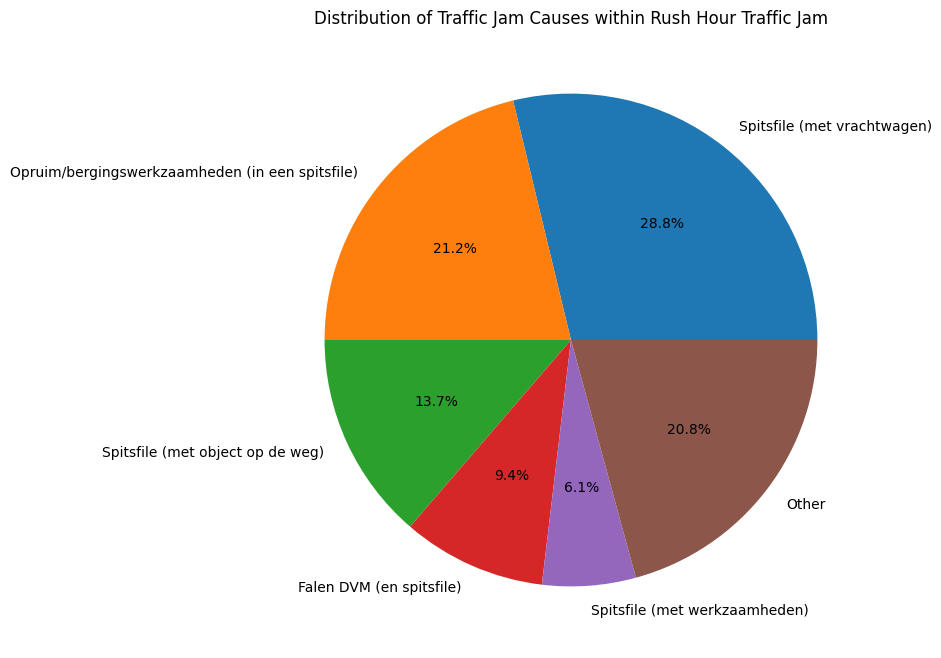

In [90]:
# Sample code to create a pie chart for all the values categorized under "rush hour traffic jam"
import pandas as pd
import matplotlib.pyplot as plt

# Simulated DataFrame (replace this line with your actual DataFrame)
df = pd.read_csv('combined_data.csv', delimiter=',')

# Function to map detailed causes to general categories
def map_cause_to_category(cause):
    if 'defect' in str(cause).lower():
        return 'Defect'
    elif 'ongeval' in str(cause).lower():
        return 'Accident'
    elif 'incident' in str(cause).lower():
        return 'Incident'
    elif 'spitsfile (geen oorzaak gemeld)' in str(cause).lower():
        return 'Rush hour traffic jam (no cause reported)'
    elif 'spitsfile' in str(cause).lower():
        return 'Rush hour traffic jam'
    elif 'file buiten spits' in str(cause).lower():
        return 'Traffic jam outside rush hour'
    elif 'werkzaamheden' in str(cause).lower():
        return 'Werkzaamheden'
    else:
        return 'Other'

# Apply the categorization function to the DataFrame
df['GeneralCause'] = df['OorzaakGronddetail'].apply(map_cause_to_category)

# Filter the DataFrame to only include 'Rush hour traffic jam' categories
rush_hour_df = df[df['GeneralCause'] == 'Rush hour traffic jam']

# Count occurrences of each detailed cause within 'Rush hour traffic jam'
rush_hour_cause_counts = rush_hour_df['OorzaakGronddetail'].value_counts()

# Take the top 3 most common causes
top_3_rush_hour_causes = rush_hour_cause_counts.nlargest(5)

# Sum the counts of all the other causes
other_rush_hour_count = rush_hour_cause_counts.sum() - top_3_rush_hour_causes.sum()

# Add 'Other' category to the top 3 causes
final_rush_hour_cause_counts_list = top_3_rush_hour_causes.tolist()
final_rush_hour_cause_counts_list.append(other_rush_hour_count)
final_rush_hour_cause_counts_index = top_3_rush_hour_causes.index.tolist()
final_rush_hour_cause_counts_index.append('Other')
final_rush_hour_cause_counts = pd.Series(final_rush_hour_cause_counts_list, index=final_rush_hour_cause_counts_index)

# Create the pie chart for 'Rush hour traffic jam'
plt.figure(figsize=(8, 8))
plt.pie(final_rush_hour_cause_counts, labels=final_rush_hour_cause_counts_index, autopct='%1.1f%%')
plt.title('Distribution of Traffic Jam Causes within Rush Hour Traffic Jam')
plt.show()
